<a href="https://colab.research.google.com/github/Nikhil199727/Sales-Forecasting/blob/main/supplyy_chain_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import json
import copy
import os
import math
from math import sqrt
import matplotlib.pyplot as plt
import statistics

In [ ]:
df_sales = pd.read_csv('Sales_data.csv')

In [ ]:
df_sales.head()

,keys,11/1/2013,12/1/2013,1/1/2014,2/1/2014,3/1/2014,4/1/2014,5/1/2014,6/1/2014,7/1/2014,...,11/1/2016,12/1/2016,1/1/2017,2/1/2017,3/1/2017,4/1/2017,5/1/2017,6/1/2017,7/1/2017,8/1/2017
0,Key_Sales_1,0,0,0,0,0,0,0,0,0,...,0,32,0,0,0,0,0,0,0,0
1,Key_Sales_2,5994,4176,5412,636,3470,3150,84,643,2784,...,8085,4152,1692,1668,3168,3408,756,3396,1428,1460
2,Key_Sales_3,1068,1362,1020,692,1500,1218,60,132,72,...,1032,642,600,498,732,1056,462,732,414,156
3,Key_Sales_4,325,324,473,270,234,242,211,302,198,...,260,247,286,177,248,252,162,156,195,492
4,Key_Sales_5,11715,19605,3946,6057,4010,14069,5514,3143,4261,...,634,432,222,270,581,390,150,417,516,932


In [ ]:
df_sales.isna().sum()

,0
keys,0
11/1/2013,0
12/1/2013,0
1/1/2014,0
2/1/2014,0
3/1/2014,0
4/1/2014,0
5/1/2014,0
6/1/2014,0
7/1/2014,0


In [ ]:
df_sales.duplicated().sum()

0

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keys       5 non-null      object
 1   11/1/2013  5 non-null      int64 
 2   12/1/2013  5 non-null      int64 
 3   1/1/2014   5 non-null      int64 
 4   2/1/2014   5 non-null      int64 
 5   3/1/2014   5 non-null      int64 
 6   4/1/2014   5 non-null      int64 
 7   5/1/2014   5 non-null      int64 
 8   6/1/2014   5 non-null      int64 
 9   7/1/2014   5 non-null      int64 
 10  8/1/2014   5 non-null      int64 
 11  9/1/2014   5 non-null      int64 
 12  10/1/2014  5 non-null      int64 
 13  11/1/2014  5 non-null      int64 
 14  12/1/2014  5 non-null      int64 
 15  1/1/2015   5 non-null      int64 
 16  2/1/2015   5 non-null      int64 
 17  3/1/2015   5 non-null      int64 
 18  4/1/2015   5 non-null      int64 
 19  5/1/2015   5 non-null      int64 
 20  6/1/2015   5 non-null      int64 
 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assuming df_sales is your DataFrame
df_long = df_sales.melt(id_vars=['keys'], var_name='date', value_name='sales')

# Convert the 'date' column to a datetime object
df_long['date'] = pd.to_datetime(df_long['date'], format='%m/%d/%Y')

# Sort the data by 'keys' and 'date'
df_long = df_long.sort_values(by=['keys', 'date'])

# Preview the reshaped data
print(df_long.head())

           keys       date  sales
0   Key_Sales_1 2013-11-01      0
5   Key_Sales_1 2013-12-01      0
10  Key_Sales_1 2014-01-01      0
15  Key_Sales_1 2014-02-01      0
20  Key_Sales_1 2014-03-01      0


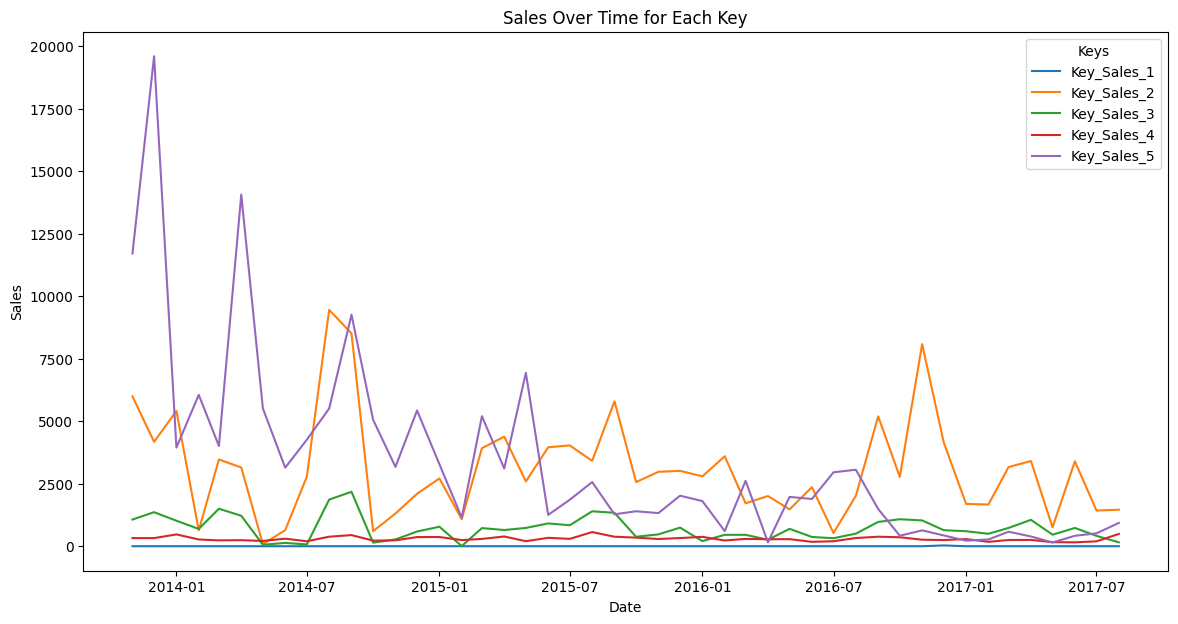

In [ ]:
# Plot sales over time for each key
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_long, x='date', y='sales', hue='keys')
plt.title('Sales Over Time for Each Key')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Keys')
plt.show()

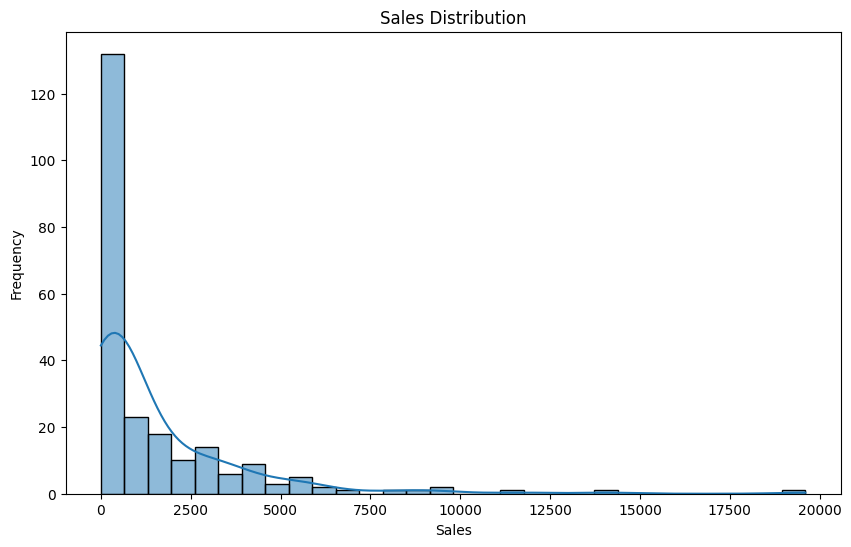

In [ ]:
# Plot distribution of sales values
plt.figure(figsize=(10, 6))
sns.histplot(df_long['sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# Prepare the data for modeling
df_long['month'] = df_long['date'].dt.month
df_long['year'] = df_long['date'].dt.year


In [ ]:
# Feature and target variable
X = df_long[['year', 'month']]
y = df_long['sales']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4973793.469887256


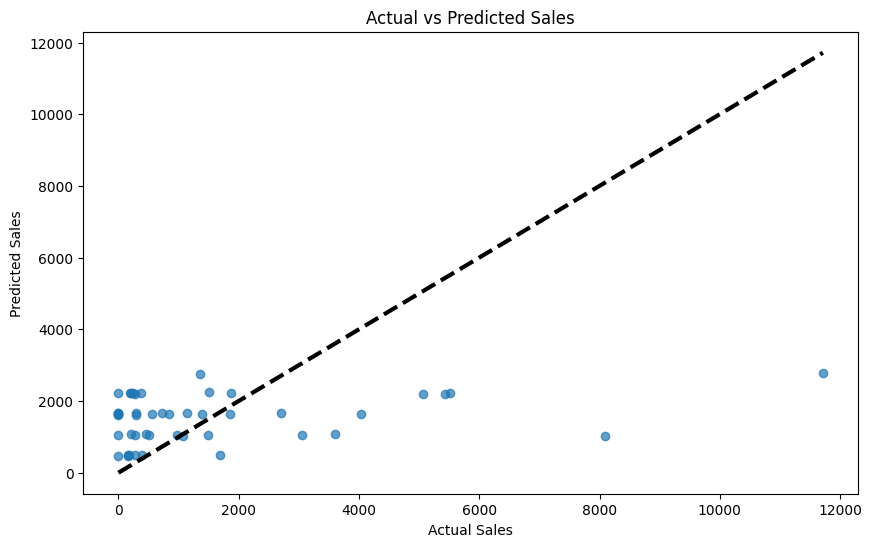

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [ ]:
# Forecasting future sales for the next 6 months
future_dates = pd.DataFrame({
    'year': [2024]*6,
    'month': [1, 2, 3, 4, 5, 6]
})

In [ ]:
# Predict future sales
future_sales_pred = model.predict(future_dates)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({
    'date': pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01']),
    'predicted_sales': future_sales_pred
})

print(future_df)

        date  predicted_sales
0 2024-01-01     -3564.533642
1 2024-02-01     -3570.749504
2 2024-03-01     -3576.965366
3 2024-04-01     -3583.181229
4 2024-05-01     -3589.397091
5 2024-06-01     -3595.612953


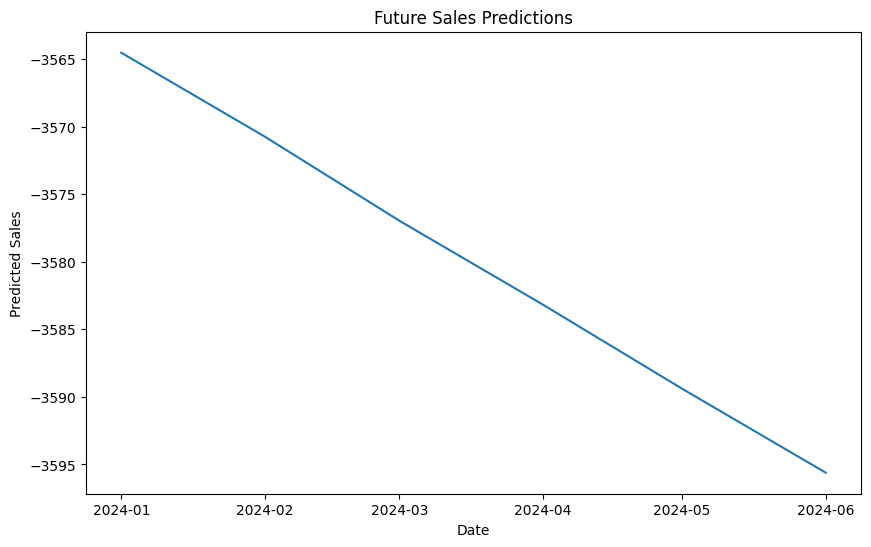

In [ ]:
# Plot future predictions
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='predicted_sales', data=future_df)
plt.title('Future Sales Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.show()

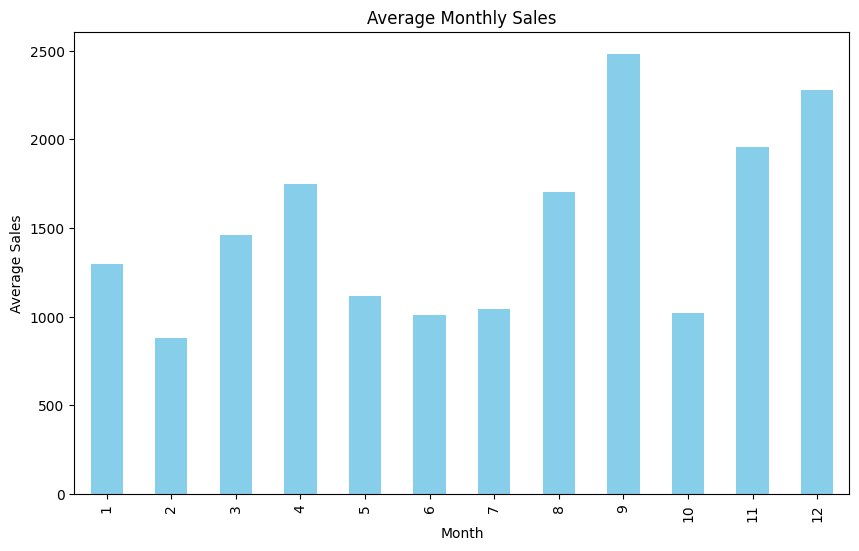

In [ ]:
# Average sales per month across all years
monthly_sales = df_long.groupby(df_long['date'].dt.month)['sales'].mean()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()